In [1]:
from nltk import pos_tag, RegexpParser,word_tokenize

import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/dai/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /home/dai/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
text='Morroccan fairy tale ends at the hands of France'

In [6]:
token=word_tokenize(text)
tags=pos_tag(token)
tags

[('Morroccan', 'JJ'),
 ('fairy', 'NN'),
 ('tale', 'NN'),
 ('ends', 'VBZ'),
 ('at', 'IN'),
 ('the', 'DT'),
 ('hands', 'NNS'),
 ('of', 'IN'),
 ('France', 'NNP')]

In [7]:
chunker=RegexpParser('''
NP: {} # Noun Phrase
p: {} # Phrase
V: {}
PP: {}
VP: {}
''')
results=chunker.parse(tags)

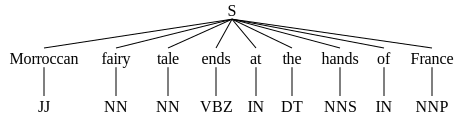

In [8]:
results

In [10]:
print(results)

(S
  Morroccan/JJ
  fairy/NN
  tale/NN
  ends/VBZ
  at/IN
  the/DT
  hands/NNS
  of/IN
  France/NNP)


In [11]:
print(repr(results))

Tree('S', [('Morroccan', 'JJ'), ('fairy', 'NN'), ('tale', 'NN'), ('ends', 'VBZ'), ('at', 'IN'), ('the', 'DT'), ('hands', 'NNS'), ('of', 'IN'), ('France', 'NNP')])


In [13]:
results.draw()

In [14]:
import spacy
# Load the model
nlp=spacy.load('en_core_web_sm')

# Creating Doc object
doc=nlp(text)

# Getting dependencies tags
for token in doc:
    print(token.text,'=>', token.dep_)
    

2022-12-22 22:51:16.960254: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-22 22:51:19.676435: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-12-22 22:51:21.177286: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-12-22 22:51:29.845262: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; 

Morroccan => compound
fairy => compound
tale => nsubj
ends => ROOT
at => prep
the => det
hands => pobj
of => prep
France => pobj


In [15]:
#Importing the  visualizer
from spacy import displacy

# Visualizing dependency tree
displacy.render(doc,jupyter=True)

In [16]:
text='It was the biggest mistake in history made by him.'

In [17]:
import spacy
# load model
nlp=spacy.load('en_core_web_sm')

# create doc object
doc=nlp(text)

# getting dependencies
for token in doc:
    print(token.text,'=>', token.dep_)
    

It => nsubj
was => ROOT
the => det
biggest => amod
mistake => attr
in => prep
history => pobj
made => acl
by => agent
him => pobj
. => punct


In [18]:
#Importing the  visualizer
from spacy import displacy

# Visualizing dependency tree
displacy.render(doc,jupyter=True)

# Extractive Summerizer

# Text Rank Summerizer 

In [19]:
text='''The Amazon River (UK: /ˈæməzən/, US: /ˈæməzɒn/; Spanish: Río Amazonas, Portuguese: Rio Amazonas) in South America is the largest river by discharge volume of water in the world, and the disputed longest river system in the world in comparison to the Nile.[2][16][n 2]

The headwaters of the Apurímac River on Nevado Mismi had been considered for nearly a century as the Amazon basin's most distant source, until a 2014 study found it to be the headwaters of the Mantaro River on the Cordillera Rumi Cruz in Peru.[21] The Mantaro and Apurímac rivers join, and with other tributaries form the Ucayali River, which in turn meets the Marañón River upstream of Iquitos, Peru, forming what countries other than Brazil consider to be the main stem of the Amazon. Brazilians call this section the Solimões River above its confluence with the Rio Negro[22] forming what Brazilians call the Amazon at the Meeting of Waters (Portuguese: Encontro das Águas) at Manaus, the largest city on the river.

The Amazon River has an average discharge of about 215,000 m3/s (7,600,000 cu ft/s)–230,000 m3/s (8,100,000 cu ft/s)—approximately 6,591 km3 (1,581 cu mi)– 7,570 km3 (1,820 cu mi) per year, greater than the next seven largest independent rivers combined. Two of the top ten rivers by discharge are tributaries of the Amazon river. The Amazon represents 20% of the global riverine discharge into oceans.[23] The Amazon basin is the largest drainage basin in the world, with an area of approximately 7,000,000 km2 (2,700,000 sq mi).[2] The portion of the river's drainage basin in Brazil alone is larger than any other river's basin. The Amazon enters Brazil with only one-fifth of the flow it finally discharges into the Atlantic Ocean, yet already has a greater flow at this point than the discharge of any other river.'''

In [20]:
print(text)

The Amazon River (UK: /ˈæməzən/, US: /ˈæməzɒn/; Spanish: Río Amazonas, Portuguese: Rio Amazonas) in South America is the largest river by discharge volume of water in the world, and the disputed longest river system in the world in comparison to the Nile.[2][16][n 2]

The headwaters of the Apurímac River on Nevado Mismi had been considered for nearly a century as the Amazon basin's most distant source, until a 2014 study found it to be the headwaters of the Mantaro River on the Cordillera Rumi Cruz in Peru.[21] The Mantaro and Apurímac rivers join, and with other tributaries form the Ucayali River, which in turn meets the Marañón River upstream of Iquitos, Peru, forming what countries other than Brazil consider to be the main stem of the Amazon. Brazilians call this section the Solimões River above its confluence with the Rio Negro[22] forming what Brazilians call the Amazon at the Meeting of Waters (Portuguese: Encontro das Águas) at Manaus, the largest city on the river.

The Amazon 

In [21]:
import sumy
import nltk


In [35]:
# !pip3 install gensim==3.6.0

from gensim.summarization import summarize



In [37]:
import gensim
gensim.__version__

'4.2.0'

In [38]:
short_text = summarize(text)
short_text

'Brazilians call this section the Solimões River above its confluence with the Rio Negro[22] forming what Brazilians call the Amazon at the Meeting of Waters (Portuguese: Encontro das Águas) at Manaus, the largest city on the river.'

In [39]:
# Import Text rank summarizer
from sumy.summarizers.text_rank import TextRankSummarizer

In [40]:
# Import the parser and tokenizer
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer

In [41]:
# Initializing the parser
my_parser= PlaintextParser.from_string(text,Tokenizer('english'))


In [42]:
# creating a summary of 3 sentences
text_rank_summarizer= TextRankSummarizer()
summary=text_rank_summarizer(my_parser.document,sentences_count=3)

In [43]:
summary

(<Sentence: The Amazon River (UK: /ˈæməzən/, US: /ˈæməzɒn/; Spanish: Río Amazonas, Portuguese: Rio Amazonas) in South America is the largest river by discharge volume of water in the world, and the disputed longest river system in the world in comparison to the Nile.>,
 <Sentence: The headwaters of the Apurímac River on Nevado Mismi had been considered for nearly a century as the Amazon basin's most distant source, until a 2014 study found it to be the headwaters of the Mantaro River on the Cordillera Rumi Cruz in Peru.>,
 <Sentence: Brazilians call this section the Solimões River above its confluence with the Rio Negro[22] forming what Brazilians call the Amazon at the Meeting of Waters (Portuguese: Encontro das Águas) at Manaus, the largest city on the river.>)

In [44]:
text='''L'Amazone (en espagnol Río Amazonas, en portugais Rio Amazonas2) est un fleuve d'Amérique du Sud. C'est le plus puissant fleuve du monde : son débit moyen estimé à l'estuaire — de 209 000 m3/s pour la période 1973-19903 — est de loin le plus élevé de celui de tous les fleuves de la planète et il équivaut au volume cumulé des six fleuves qui le suivent immédiatement dans l'ordre des débits. À elle seuleβ, l'Amazone représente d'ailleurs environ un cinquième du débit fluvial du monde entier4.

Avec ses 7 025 km5 (dans sa branche Apurímac-Ucayali6), c'est le plus long fleuve de la Terre avec le Nilα.

L'Amazone est aussi le plus grand fleuve par l'immensité de son bassin. Il draine une surface de 6 112 000 km2 (sans le rio Tocantins) soit 40 % de l'Amérique du Sud et l'équivalent d'une fois et demie la surface de l'Union européenne (le Congo, deuxième fleuve pour la superficie de son bassin, atteint "seulement" 3,8 millions de km2). Le bassin de l'Amazone s'étend des latitudes 5° nord jusqu’à 20° sud. Le fleuve prend sa source dans la cordillère des Andes, traverse le Pérou, la Colombie et le Brésil, et se jette dans l'océan Atlantique au niveau de l'équateur.'''

In [45]:
my_parser= PlaintextParser.from_string(text,Tokenizer('french'))


In [46]:
# creating a summary of 3 sentences
text_rank_summarizer= TextRankSummarizer()
summary=text_rank_summarizer(my_parser.document,sentences_count=3)

In [47]:
summary

(<Sentence: C'est le plus puissant fleuve du monde : son débit moyen estimé à l'estuaire — de 209 000 m3/s pour la période 1973-19903 — est de loin le plus élevé de celui de tous les fleuves de la planète et il équivaut au volume cumulé des six fleuves qui le suivent immédiatement dans l'ordre des débits.>,
 <Sentence: Il draine une surface de 6 112 000 km2 (sans le rio Tocantins) soit 40 % de l'Amérique du Sud et l'équivalent d'une fois et demie la surface de l'Union européenne (le Congo, deuxième fleuve pour la superficie de son bassin, atteint "seulement" 3,8 millions de km2).>,
 <Sentence: Le fleuve prend sa source dans la cordillère des Andes, traverse le Pérou, la Colombie et le Brésil, et se jette dans l'océan Atlantique au niveau de l'équateur.>)

# Lex Rank Summerizer

In [48]:
from sumy.summarizers.lex_rank import LexRankSummarizer

In [49]:
# creating a summary of three sentences
lex_rank_summarizer=LexRankSummarizer()
summary=lex_rank_summarizer(my_parser.document,sentences_count=3)

In [50]:
summary

(<Sentence: L'Amazone (en espagnol Río Amazonas, en portugais Rio Amazonas2) est un fleuve d'Amérique du Sud.>,
 <Sentence: C'est le plus puissant fleuve du monde : son débit moyen estimé à l'estuaire — de 209 000 m3/s pour la période 1973-19903 — est de loin le plus élevé de celui de tous les fleuves de la planète et il équivaut au volume cumulé des six fleuves qui le suivent immédiatement dans l'ordre des débits.>,
 <Sentence: À elle seuleβ, l'Amazone représente d'ailleurs environ un cinquième du débit fluvial du monde entier4.>)

In [51]:
text='''The Amazon River (UK: /ˈæməzən/, US: /ˈæməzɒn/; Spanish: Río Amazonas, Portuguese: Rio Amazonas) in South America is the largest river by discharge volume of water in the world, and the disputed longest river system in the world in comparison to the Nile.[2][16][n 2]

The headwaters of the Apurímac River on Nevado Mismi had been considered for nearly a century as the Amazon basin's most distant source, until a 2014 study found it to be the headwaters of the Mantaro River on the Cordillera Rumi Cruz in Peru.[21] The Mantaro and Apurímac rivers join, and with other tributaries form the Ucayali River, which in turn meets the Marañón River upstream of Iquitos, Peru, forming what countries other than Brazil consider to be the main stem of the Amazon. Brazilians call this section the Solimões River above its confluence with the Rio Negro[22] forming what Brazilians call the Amazon at the Meeting of Waters (Portuguese: Encontro das Águas) at Manaus, the largest city on the river.

The Amazon River has an average discharge of about 215,000 m3/s (7,600,000 cu ft/s)–230,000 m3/s (8,100,000 cu ft/s)—approximately 6,591 km3 (1,581 cu mi)– 7,570 km3 (1,820 cu mi) per year, greater than the next seven largest independent rivers combined. Two of the top ten rivers by discharge are tributaries of the Amazon river. The Amazon represents 20% of the global riverine discharge into oceans.[23] The Amazon basin is the largest drainage basin in the world, with an area of approximately 7,000,000 km2 (2,700,000 sq mi).[2] The portion of the river's drainage basin in Brazil alone is larger than any other river's basin. The Amazon enters Brazil with only one-fifth of the flow it finally discharges into the Atlantic Ocean, yet already has a greater flow at this point than the discharge of any other river.'''

In [52]:
my_parser= PlaintextParser.from_string(text,Tokenizer('french'))


In [53]:
# creating a summary of three sentences
lex_rank_summarizer=LexRankSummarizer()
summary=lex_rank_summarizer(my_parser.document,sentences_count=3)

In [54]:
summary

(<Sentence: [21] The Mantaro and Apurímac rivers join, and with other tributaries form the Ucayali River, which in turn meets the Marañón River upstream of Iquitos, Peru, forming what countries other than Brazil consider to be the main stem of the Amazon.>,
 <Sentence: [23] The Amazon basin is the largest drainage basin in the world, with an area of approximately 7,000,000 km2 (2,700,000 sq mi).>,
 <Sentence: [2] The portion of the river's drainage basin in Brazil alone is larger than any other river's basin.>)

# LSA Summarizer

In [55]:
from sumy.summarizers.lsa import LsaSummarizer

In [56]:
# Creating a summary of three  sentences
lsa_summarizer=LsaSummarizer()
summary=lsa_summarizer(my_parser.document,sentences_count=3)

In [57]:

summary

(<Sentence: Two of the top ten rivers by discharge are tributaries of the Amazon river.>,
 <Sentence: [2] The portion of the river's drainage basin in Brazil alone is larger than any other river's basin.>,
 <Sentence: The Amazon enters Brazil with only one-fifth of the flow it finally discharges into the Atlantic Ocean, yet already has a greater flow at this point than the discharge of any other river.>)

In [59]:
# ! pip install transformers

In [60]:
# GPT Transformers

In [61]:
from transformers import GPT2Tokenizer,GPT2LMHeadModel

In [63]:
# instantiating the model and tokenizer with gpt-2
tokenizer=GPT2Tokenizer.from_pretrained('gpt2')
model=GPT2LMHeadModel.from_pretrained('gpt2')

In [64]:
# Encoding rext to get input ids & pass them to model.generate()
inputs = tokenizer.batch_encode_plus([text],return_tensors='pt')
summary_ids = model.generate(inputs['input_ids'],early_stopping=True)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
/home/dai/anaconda3/lib/python3.9/site-packages/transformers/generation/utils.py:1387: UserWarning: Neither `max_length` nor `max_new_tokens` has been set, `max_length` will default to 20 (`self.config.max_length`). Controlling `max_length` via the config is deprecated and `max_length` will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
Input length of input_ids is 478, but `max_length` is set to 20. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


In [65]:
# Decoding and printing summary 
GPT_summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
print(GPT_summary)

The Amazon River (UK: /ˈæməzən/, US: /ˈæməzɒn/; Spanish: Río Amazonas, Portuguese: Rio Amazonas) in South America is the largest river by discharge volume of water in the world, and the disputed longest river system in the world in comparison to the Nile.[2][16][n 2]

The headwaters of the Apurímac River on Nevado Mismi had been considered for nearly a century as the Amazon basin's most distant source, until a 2014 study found it to be the headwaters of the Mantaro River on the Cordillera Rumi Cruz in Peru.[21] The Mantaro and Apurímac rivers join, and with other tributaries form the Ucayali River, which in turn meets the Marañón River upstream of Iquitos, Peru, forming what countries other than Brazil consider to be the main stem of the Amazon. Brazilians call this section the Solimões River above its confluence with the Rio Negro[22] forming what Brazilians call the Amazon at the Meeting of Waters (Portuguese: Encontro das Águas) at Manaus, the largest city on the river.

The Amazon 

In [66]:
# Logistic function
import numpy as np
import matplotlib.pyplot as plt

In [67]:
x = np.arange(-5,5,0.25)
x

array([-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  ,
       -2.75, -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75,
       -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,
        1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,
        4.  ,  4.25,  4.5 ,  4.75])

In [68]:
y = x * 23 + 45.12 # linear function ... you can create any combination out of it

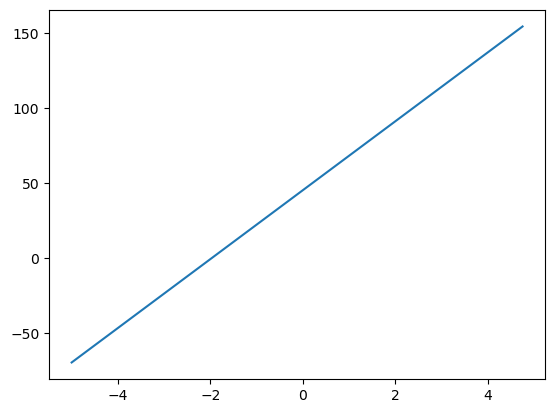

In [70]:
plt.plot(x,y) # linear

In [71]:
def logistic(z):
    val = 1 / (1 + np.exp(-z))
    return val

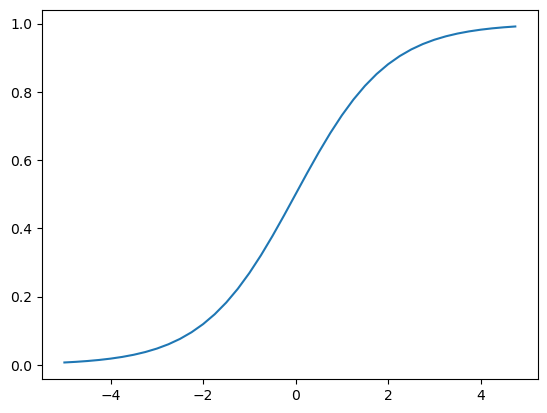

In [72]:
plt.plot(x, logistic(x))

In [73]:
logistic(-2.35)

0.08706577244027125

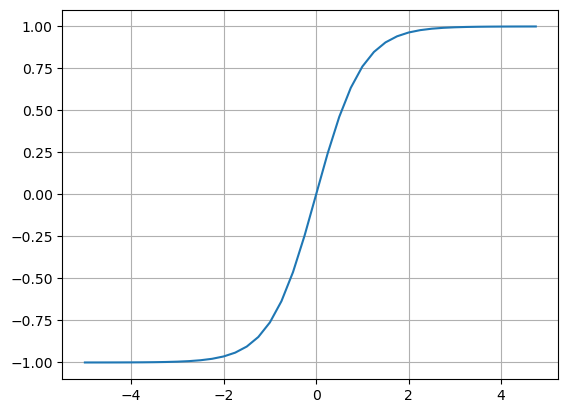

In [74]:
plt.plot(x, np.tanh(x))
plt.grid()

In [75]:
def softmax(z):
    val = np.exp(z) / np.sum(np.exp(z))
    return val

In [76]:
softmax([12.45,13.56,11.96,12.78,11.098])

array([0.15881397, 0.48189851, 0.09729363, 0.22090517, 0.04108872])

In [77]:
np.sum(softmax([12.45,13.56,11.96,12.78,11.098])) # sum of all distributed probablities = 1 / 100 %

1.0

### discrete time models

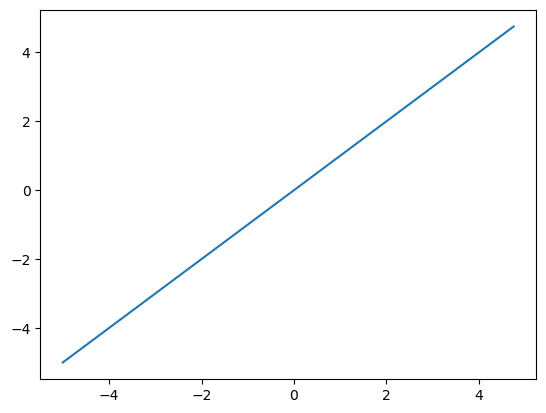

In [78]:
plt.plot(x,x) # linear growth

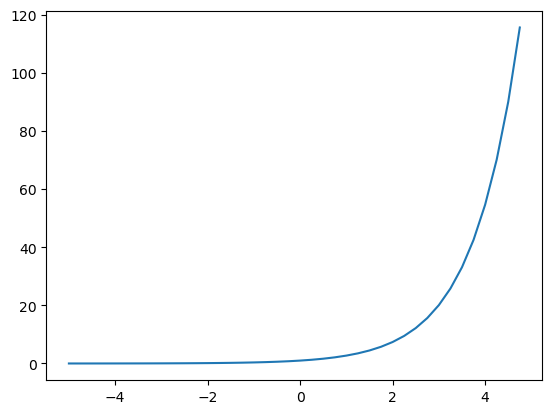

In [79]:
plt.plot(x,np.exp(x)) # exponential growth

In [80]:
x = np.arange(0,10,0.25)

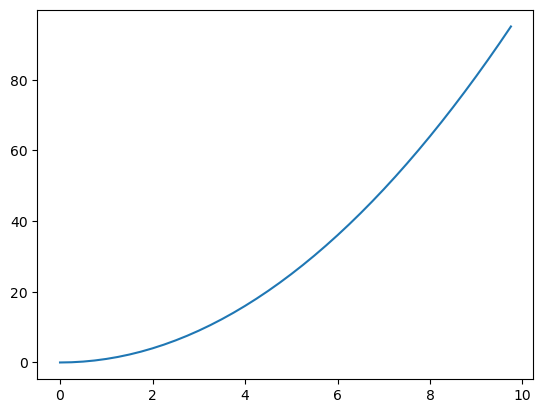

In [81]:
plt.plot(x , x**2) # polynomial growth (depends on the data that you feed)

## Bag of words

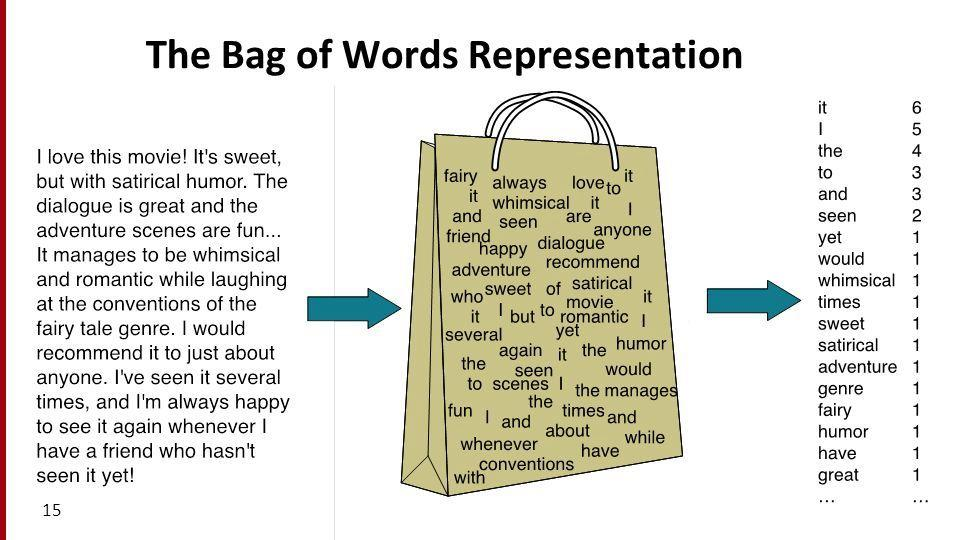

In [82]:
# bag of words
from sklearn.feature_extraction.text import CountVectorizer

In [83]:
sentence_1 = "This is a good job. I will not miss it for anything"
sentence_2 = "This is not good at all. The good thing is that it is bad job"
sentence_3 = "This is a good thing about this place. I like this job "

In [84]:
# Create the object
cv = CountVectorizer(stop_words='english') # if we add stopwords parameter 
                       # cv = CountVectorizer(stop_words='english') then stop words will we removed

In [85]:
bag_of_words = cv.fit_transform([sentence_1,sentence_2,sentence_3])

In [86]:
bag_of_words # it is in a sparce matrix format so we have to 
             # convert it into pandas dataframe to properly display it

<3x7 sparse matrix of type '<class 'numpy.int64'>'
	with 12 stored elements in Compressed Sparse Row format>

In [87]:
import pandas as pd

In [88]:
cv.get_feature_names() 

/home/dai/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['bad', 'good', 'job', 'like', 'miss', 'place', 'thing']

In [89]:
cv.get_feature_names_out() 

array(['bad', 'good', 'job', 'like', 'miss', 'place', 'thing'],
      dtype=object)

In [90]:
# create the dataframe
cv_dataframe = pd.DataFrame(bag_of_words.toarray(), columns=cv.get_feature_names_out())

In [91]:
cv_dataframe

,bad,good,job,like,miss,place,thing
0,0,1,1,0,1,0,0
1,1,2,1,0,0,0,1
2,0,1,1,1,0,1,1


## N-gram method

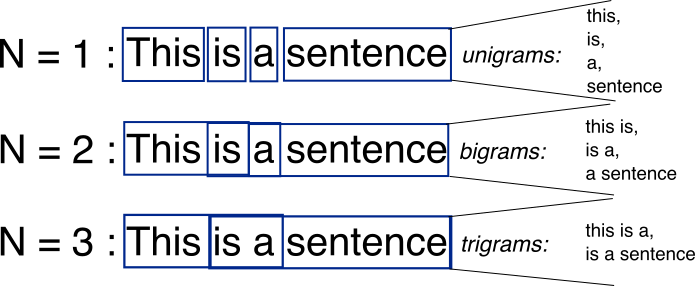

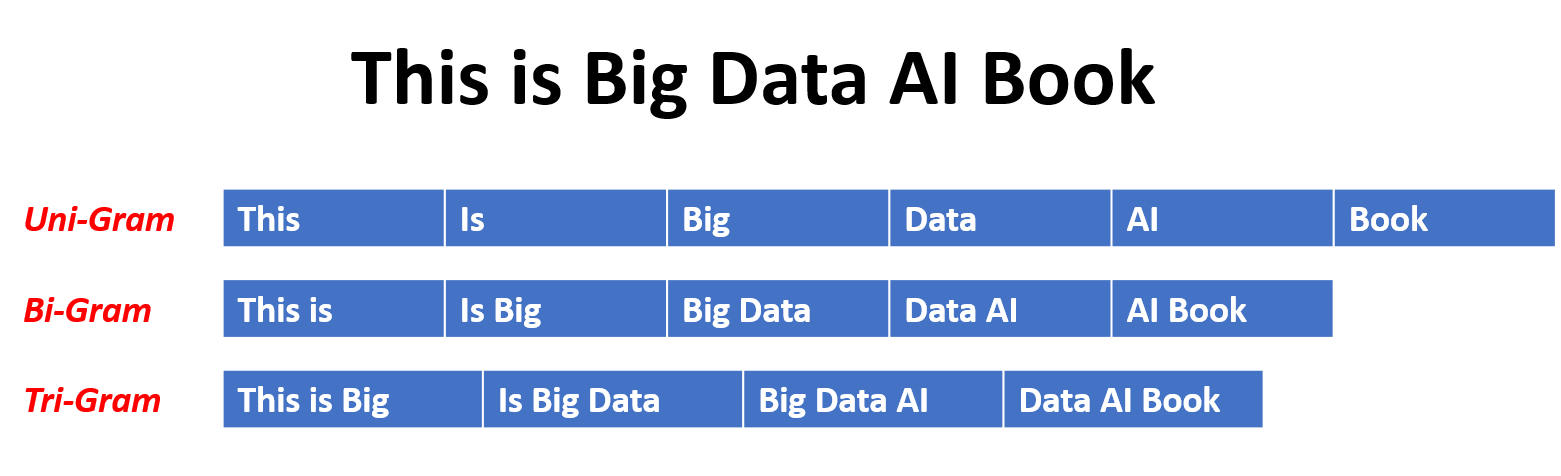

In [92]:
sentence_1 = "This is a good job. I will not miss it for anything"
sentence_2 = "This is not good at all. The good thing is that it is bad job"
sentence_3 = "This is a good thing about this place. I like this job "

In [93]:
# Create the object
cv = CountVectorizer(stop_words='english',ngram_range=(1, 2)) 
# if we add stopwords parameter  cv = CountVectorizer(stop_words='english') then stop words will we removed

In [94]:
n_grams = cv.fit_transform([sentence_1,sentence_2,sentence_3])

In [95]:
n_grams # it is in a sparce matrix format so we have to 
             # convert it into pandas dataframe to properly display it

<3x16 sparse matrix of type '<class 'numpy.int64'>'
	with 22 stored elements in Compressed Sparse Row format>

In [96]:
cv.get_feature_names() 

/home/dai/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['bad',
 'bad job',
 'good',
 'good good',
 'good job',
 'good thing',
 'job',
 'job miss',
 'like',
 'like job',
 'miss',
 'place',
 'place like',
 'thing',
 'thing bad',
 'thing place']

In [97]:
cv.get_feature_names_out() 

array(['bad', 'bad job', 'good', 'good good', 'good job', 'good thing',
       'job', 'job miss', 'like', 'like job', 'miss', 'place',
       'place like', 'thing', 'thing bad', 'thing place'], dtype=object)

In [98]:
# create the dataframe
cv_dataframe = pd.DataFrame(n_grams.toarray(), columns=cv.get_feature_names_out())

In [99]:
cv_dataframe

,bad,bad job,good,good good,good job,good thing,job,job miss,like,like job,miss,place,place like,thing,thing bad,thing place
0,0,0,1,0,1,0,1,1,0,0,1,0,0,0,0,0
1,1,1,2,1,0,1,1,0,0,0,0,0,0,1,1,0
2,0,0,1,0,0,1,1,0,1,1,0,1,1,1,0,1


## The TF-IDF Vectorizer

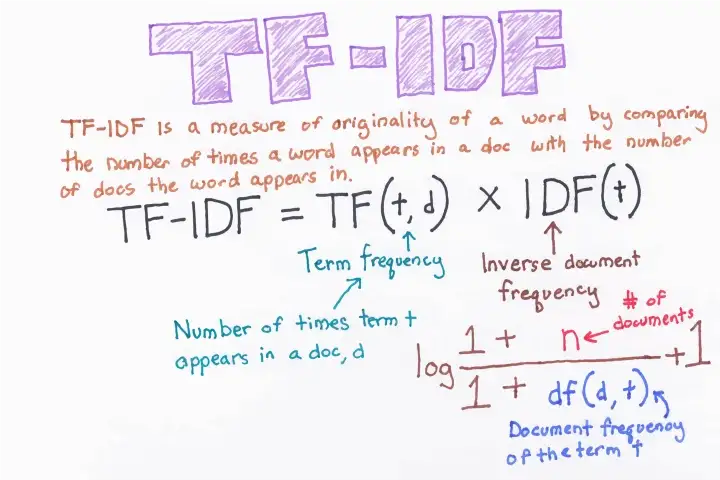

#### Convert a collection of raw documents to a matrix of TF-IDF features.

#### Equivalent to CountVectorizer followed by TfidfTransformer.